In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns

/Users/anika/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading / Preprocessing Data

In [5]:
# Read in data from github
github_url_2010s_data = "https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/refs/heads/master/charting-m-points-2010s.csv"
github_url_2020s_data = "https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/refs/heads/master/charting-m-points-2020s.csv"
github_url_match_data = "https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/refs/heads/master/charting-m-matches.csv"

df_2010s = pd.read_csv(github_url_2010s_data)
df_2020s = pd.read_csv(github_url_2020s_data)
df_matches = pd.read_csv(github_url_match_data)
df = pd.concat([df_2010s, df_2020s], axis=0)
df = pd.merge(df, df_matches, on='match_id', sort="date")
df = df[df['Date'] >= '2015'] # Use more recent data 
df = df.drop(['Time', 'Court', 'Umpire', 'Charted by', 'Notes', 'Final TB?'], axis=1)

/Users/anika/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.columns

Index(['match_id', 'Pt', 'Set1', 'Set2', 'Gm1', 'Gm2', 'Pts', 'Gm#', 'TbSet',
       'Svr', '1st', '2nd', 'PtWinner', 'Player 1', 'Player 2', 'Pl 1 hand',
       'Pl 2 hand', 'Date', 'Tournament', 'Round', 'Surface', 'Best of'],
      dtype='object')

In [7]:
df

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,Svr,...,PtWinner,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Date,Tournament,Round,Surface,Best of
94807,20150105-M-Doha-R32-Rafael_Nadal-Michael_Berrer,1,0,0,0,0.0,0-0,1,True,1,...,1,Rafael Nadal,Michael Berrer,L,L,20150105,Doha,R32,Hard,3
94808,20150105-M-Doha-R32-Rafael_Nadal-Michael_Berrer,2,0,0,0,0.0,15-0,1,True,1,...,1,Rafael Nadal,Michael Berrer,L,L,20150105,Doha,R32,Hard,3
94809,20150105-M-Doha-R32-Rafael_Nadal-Michael_Berrer,3,0,0,0,0.0,30-0,1,True,1,...,1,Rafael Nadal,Michael Berrer,L,L,20150105,Doha,R32,Hard,3
94810,20150105-M-Doha-R32-Rafael_Nadal-Michael_Berrer,4,0,0,0,0.0,40-0,1,True,1,...,1,Rafael Nadal,Michael Berrer,L,L,20150105,Doha,R32,Hard,3
94811,20150105-M-Doha-R32-Rafael_Nadal-Michael_Berrer,5,0,0,1,0.0,0-0,2,True,2,...,1,Rafael Nadal,Michael Berrer,L,L,20150105,Doha,R32,Hard,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731926,20241229-M-United_Cup-RR-Thiago_Monteiro-Alexa...,100,0,1,4,5.0,0-15,20,True,2,...,2,Thiago Monteiro,Alexander Zverev,L,R,20241229,United Cup,RR,Hard,3
731927,20241229-M-United_Cup-RR-Thiago_Monteiro-Alexa...,101,0,1,4,5.0,15-15,20,True,2,...,1,Thiago Monteiro,Alexander Zverev,L,R,20241229,United Cup,RR,Hard,3
731928,20241229-M-United_Cup-RR-Thiago_Monteiro-Alexa...,102,0,1,4,5.0,15-30,20,True,2,...,2,Thiago Monteiro,Alexander Zverev,L,R,20241229,United Cup,RR,Hard,3
731929,20241229-M-United_Cup-RR-Thiago_Monteiro-Alexa...,103,0,1,4,5.0,30-30,20,True,2,...,2,Thiago Monteiro,Alexander Zverev,L,R,20241229,United Cup,RR,Hard,3


In [8]:
print(df['Round'].unique())

# Get rid of the rounds RR (Round robin), PO (Preliminary), BR (Bronze round), and Unipol Arena (incorrect)
df = df[df['Round'] != 'RR']
df = df[df['Round'] != 'PO']
df = df[df['Round'] != 'Unipol Arena']
df = df[df['Round'] != 'BR']
print(df['Round'].unique())


['R32' 'R16' 'QF' 'F' 'R128' 'R64' 'SF' 'Q3' 'RR' 'Q1' 'Q2' 'BR' 'PO'
 'Unipol Arena']
['R32' 'R16' 'QF' 'F' 'R128' 'R64' 'SF' 'Q3' 'Q1' 'Q2']


In [9]:
# Find all match_ids where the points are charted incorrectly, missing points, etc.

next_point_dict = {
    "0-0": ["0-15", "15-0", "1-0", "0-1"],
    "0-15": ["0-30", "15-15"],
    "0-30": ["0-40", "15-30"],
    "0-40": ["15-40", "0-0"],
    "15-0": ["15-15", "30-0"],
    "15-15": ["15-30", "30-15"],
    "15-30": ["15-40", "30-30"],
    "15-40": ["30-40", "0-0"],
    "30-0": ["30-15", "40-0"],
    "30-15": ["30-30", "40-15"],
    "30-30": ["30-40", "40-30"],
    "30-40": ["40-40", "0-0"],
    "40-0": ["40-15", "0-0"],
    "40-15": ["40-30", "0-0"],
    "40-30": ["40-40", "0-0"],
    "40-40": ["AD-40", "40-AD", "0-0"],
    "AD-40": ["40-40", "0-0"],
    "40-AD": ["40-40", "0-0"]
}

def check_tiebreak(pt1, pt2):
    pt1, pt2 = pt1.strip(), pt2.strip()
    pt1 = pt1.split("-")
    pt2 = pt2.split("-")
    pt1 = [int(x) for x in pt1]
    pt2 = [int(x) for x in pt2]
    if sum(pt1) % 2 == 0:
        return pt2 == [pt1[1]+1, pt1[0]] or pt2 == [pt1[1], pt1[0]+1] or pt2 == [0, 0]
    else:
        return pt2 == [pt1[0], pt1[1]+1] or pt2 == [pt1[0]+1, pt1[1]] or pt2 == [0, 0]

def find_matches_charted_incorrectly(df):
    incorrect_matches = []
    for match_id in df['match_id'].unique():
        df_match = df[df['match_id'] == match_id].sort_values('Pt')
        for i in range(df_match.shape[0] - 1):
            pt1 = df_match.iloc[i]['Pts']
            pt2 = df_match.iloc[i+1]['Pts']
            if (pt1 in next_point_dict and pt2 not in next_point_dict[pt1]) or (pt1 not in next_point_dict and not check_tiebreak(pt1, pt2)):
                incorrect_matches.append(match_id)
                break
            if df_match.iloc[i]['Pt'] != df_match.iloc[i+1]['Pt'] - 1:
                incorrect_matches.append(match_id)
                break
    return incorrect_matches

# Remove the matches that are charted incorrectly
# incorrect_matches = find_matches_charted_incorrectly(df)
incorrect_matches = [
    '20120129-M-Australian_Open-F-Novak_Djokovic-Rafael_Nadal',
    '20121112-M-Tour_Finals-F-Roger_Federer-Novak_Djokovic',
    '20131005-M-Tokyo-SF-Nicolas_Almagro-Juan_Martin_Del_Potro',
    '20140423-M-Barcelona-R32-Albert_Ramos-Rafael_Nadal',
    '20160718-M-Washington-R64-Dudi_Sela-Taylor_Fritz',
    '20190212-M-Buenos_Aires-R16-Aljaz_Bedene-Diego_Schwartzman',
    '20220117-M-Australian_Open-R128-Federico_Delbonis-Pedro_Martinez',
    '20220212-M-Dallas-SF-John_Isner-Reilly_Opelka',
    '20220812-M-Canada_Masters-QF-Hubert_Hurkacz-Nick_Kyrgios',
    '20230227-M-Dubai-R32-Alejandro_Davidovich_Fokina-Malek_Jaziri',
    '20230426-M-Madrid_Masters-R128-Daniel_Elahi_Galan-Alexander_Bublik'
]
print(len(incorrect_matches), incorrect_matches)
df = df[~df['match_id'].isin(incorrect_matches)]

11 ['20120129-M-Australian_Open-F-Novak_Djokovic-Rafael_Nadal', '20121112-M-Tour_Finals-F-Roger_Federer-Novak_Djokovic', '20131005-M-Tokyo-SF-Nicolas_Almagro-Juan_Martin_Del_Potro', '20140423-M-Barcelona-R32-Albert_Ramos-Rafael_Nadal', '20160718-M-Washington-R64-Dudi_Sela-Taylor_Fritz', '20190212-M-Buenos_Aires-R16-Aljaz_Bedene-Diego_Schwartzman', '20220117-M-Australian_Open-R128-Federico_Delbonis-Pedro_Martinez', '20220212-M-Dallas-SF-John_Isner-Reilly_Opelka', '20220812-M-Canada_Masters-QF-Hubert_Hurkacz-Nick_Kyrgios', '20230227-M-Dubai-R32-Alejandro_Davidovich_Fokina-Malek_Jaziri', '20230426-M-Madrid_Masters-R128-Daniel_Elahi_Galan-Alexander_Bublik']


In [11]:
# Print number of unique values in the match_id, Player 1, Player 2, columns
print("Number of unique values in the match_id, Player 1, Player 2 columns:")
print(df[['match_id', 'Player 1', 'Player 2']].nunique())

Number of unique values in the match_id, Player 1, Player 2 columns:
match_id    3705
Player 1     440
Player 2     428
dtype: int64


In [12]:
# Count number of matches per player, where player can be either player 1 or player 2

players = set(df['Player 1'].unique().tolist() + df['Player 2'].unique().tolist())
player_match_counts_1 = df.groupby('Player 1')['match_id'].unique()
player_match_counts_2 = df.groupby('Player 2')['match_id'].unique()

for player in players:
    if player in player_match_counts_1:
        # assert that the matches in player_match_counts_1 and player_match_counts_2 are NOT the same for each player
        if player in player_match_counts_2:
            for match in player_match_counts_1[player]:
                assert match not in player_match_counts_2[player]

In [13]:
# To find match_point_counts get the max value of Pt for each match_id
match_point_counts = df.groupby('match_id')['Pt'].max().reset_index()

In [14]:
# Get number of poitns per match
match_point_counts = df.groupby('match_id')['Pt'].max().reset_index()

# Create series of match_ids for Player 1 and Player 2
player_match_counts_1 = df.groupby('Player 1')['match_id'].apply(list)
player_match_counts_2 = df.groupby('Player 2')['match_id'].apply(list)

df1 = player_match_counts_1.rename_axis('player').reset_index(name='match_ids')
df2 = player_match_counts_2.rename_axis('player').reset_index(name='match_ids')
combined = pd.concat([df1, df2], ignore_index=True)
player_matches = combined.groupby('player')['match_ids'].agg(lambda lists: list(np.unique(sum(lists, [])))).reset_index()
player_matches['num_points'] = player_matches['match_ids'].apply(lambda x: sum(match_point_counts[match_point_counts['match_id'].isin(x)]['Pt']))

player_matches

,player,match_ids,num_points
0,Abedallah Shelbayh,[20230219-M-Manama_CH-F-Thanasi_Kokkinakis-Abe...,296
1,Adam Pavlasek,[20160225-M-Cherbourg_CH-R16-Ramkumar_Ramanath...,364
2,Adam Walton,[20240114-M-Australian_Open-R128-Matteo_Arnald...,206
3,Adrian Andreev,[20220929-M-Orleans_CH-R16-Corentin_Moutet-Adr...,536
4,Adrian Mannarino,[20150726-M-Bogota-F-Bernard_Tomic-Adrian_Mann...,8986
...,...,...,...
569,Ze Zhang,[20151008-M-Beijing-R16-Novak_Djokovic-Ze_Zhan...,221
570,Zhe Li,[20170114-M-Bangkok_CH-F-Zhe_Li-Janko_Tipsarev...,290
571,Zhizhen Zhang,[20190926-M-Zhuhai-R16-Zhizhen_Zhang-Andreas_S...,2645
572,Zizou Bergs,[20210328-M-Lille_CH-F-Gregoire_Barrere-Zizou_...,994


In [15]:
# Count how many players have 0-100 points, 100-1000 points, 1000-5000 points, 5000-10000 points, and 10000+ points
player_matches['num_points'].value_counts()
bins = [0, 100, 1000, 5000, 10000, float('inf')]
labels = ['0-100', '100-1000', '1000-5000', '5000-10000', '10000+']
pd.cut(player_matches['num_points'], bins=bins, labels=labels).value_counts()

100-1000      335
1000-5000     127
0-100          50
5000-10000     32
10000+         30
Name: num_points, dtype: int64

In [32]:
df_atp_players = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_players.csv")
df_rankings_2010s = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_10s.csv")
df_rankings_2010s = df_rankings_2010s[df_rankings_2010s['ranking_date'] >= 2015]
df_rankings_2020s = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_20s.csv")
df_rankings_current = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/refs/heads/master/atp_rankings_current.csv")
# concat all rankings dfs
df_rankings = pd.concat([df_rankings_2010s, df_rankings_2020s, df_rankings_current], axis=0)
# rename player to player_id
df_rankings = df_rankings.rename(columns={'player': 'player_id'})
df_rankings = pd.merge(df_rankings, df_atp_players, on='player_id', sort='ranking_date')
# create a column player that is the concatenation of name_first and name_last
df_rankings['player'] = df_rankings['name_first'] + " " + df_rankings['name_last']
# average rank by player
df_average_rank = df_rankings.groupby(['player'])['rank'].min().reset_index()

/Users/anika/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
player_matches_and_rank = pd.merge(player_matches, df_average_rank, how='inner', on='player')
player_matches_and_rank['num_matches'] = player_matches_and_rank['match_ids'].apply(lambda x: len(x))
player_matches_and_rank

,player,match_ids,num_points,rank,num_matches
0,Abedallah Shelbayh,[20230219-M-Manama_CH-F-Thanasi_Kokkinakis-Abe...,296,181,2
1,Adam Pavlasek,[20160225-M-Cherbourg_CH-R16-Ramkumar_Ramanath...,364,72,3
2,Adam Walton,[20240114-M-Australian_Open-R128-Matteo_Arnald...,206,86,1
3,Adrian Andreev,[20220929-M-Orleans_CH-R16-Corentin_Moutet-Adr...,536,183,3
4,Adrian Mannarino,[20150726-M-Bogota-F-Bernard_Tomic-Adrian_Mann...,8986,17,54
...,...,...,...,...,...
561,Ze Zhang,[20151008-M-Beijing-R16-Novak_Djokovic-Ze_Zhan...,221,148,2
562,Zhe Li,[20170114-M-Bangkok_CH-F-Zhe_Li-Janko_Tipsarev...,290,193,2
563,Zhizhen Zhang,[20190926-M-Zhuhai-R16-Zhizhen_Zhang-Andreas_S...,2645,31,16
564,Zizou Bergs,[20210328-M-Lille_CH-F-Gregoire_Barrere-Zizou_...,994,61,6


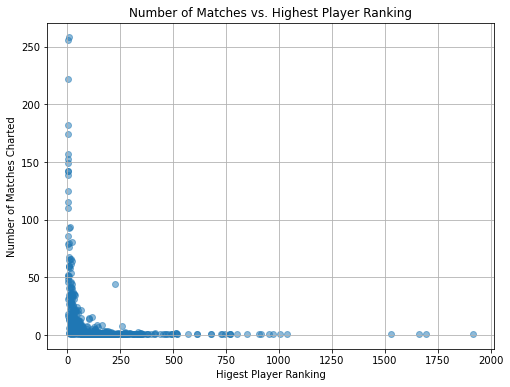

In [48]:
# Visualization: Number of Matches vs. Average Player Rank
plt.figure(figsize=(8, 6))
plt.scatter(player_matches_and_rank['rank'], player_matches_and_rank['num_matches'], alpha=0.5)
plt.xlabel('Higest Player Ranking')
plt.ylabel('Number of Matches Charted')
plt.title('Number of Matches vs. Highest Player Ranking')
plt.grid(True)
plt.show()


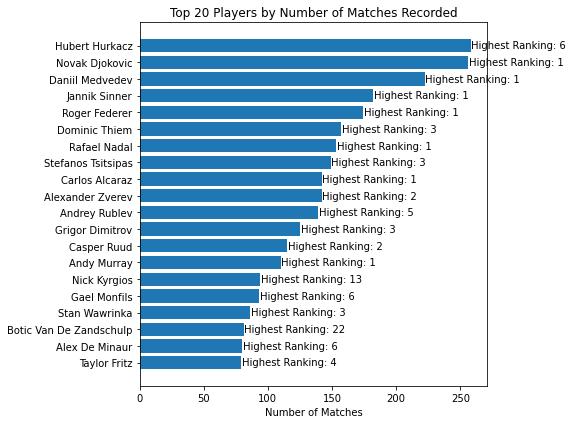

In [49]:
# Visualization: Top 30 Players by Number of Matches Charted
top_players = player_matches_and_rank.sort_values(by='num_matches', ascending=False).head(20)

plt.figure(figsize=(8, 6))
bars = plt.barh(top_players['player'], top_players['num_matches'])
plt.xlabel('Number of Matches')
plt.title('Top 20 Players by Number of Matches Recorded')
plt.gca().invert_yaxis()  # Highest first

# Add average rank labels next to each bar
for bar, rank in zip(bars, top_players['rank']):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'Highest Ranking: {int(rank)}', va='center')

plt.tight_layout()
plt.show()

In [50]:
# List all players with at least 15 matches charted
players_15_matches = player_matches_and_rank[player_matches_and_rank['num_matches'] >= 15]['player'].values
# Count match_ids in df where both player 1 and player 2 are in players_15_matches
matches_15_players = df[df['Player 1'].isin(players_15_matches) & df['Player 2'].isin(players_15_matches)]
# # Count unique matches
# matches_15_players = matches_15_players['match_id'].unique()
# print("Number of matches between players with at least 15 matches:", len(matches_15_players))

### Serve + 1 Data Analysis

In [51]:
def decode_rally(code_str, server):
    translation_table = str.maketrans('', '', '!+c;-=^ ')
    code_str = code_str.translate(translation_table)

    shots = []

    shot = {
        'player': server,
        'shot': None,
        'location': None,
        'depth': None,
        'error': None,
        'error_type': None,
        'unreturnable': False
    }

    location_map = {
        '1': 'deuce court',
        '2': 'middle',
        '3': 'ad court',
        '4': 'wide',   # wide serve
        '5': 'body',       # body serve
        '6': 'T',  # down the T
        '7': 'short',
        '8': 'middle',
        '9': 'deep',
        '0': 'unknown'
    }

    error_loc_map = {
        'n': 'net', 'w': 'wide', 'd': 'deep', 'x': 'wide and deep',
        '!': 'shank', 'e': 'unknown', 'g': 'foot fault', 'V': 'time violation'
    }

    shot_map = {
        'f': 'forehand', 'b': 'backhand', 'r': 'forehand slice', 's': 'backhand slice',
        'v': 'forehand volley', 'z': 'backhand volley', 'o': 'overhead', 'p': 'backhand overhead',
        'u': 'forehand drop shot', 'y': 'backhand drop shot', 'l': 'forehand lob',
        'm': 'backhand lob', 'h': 'forehand half-volley', 'i': 'backhand half-volley',
        'j': 'forehand swinging volley', 'k': 'backhand swinging volley',
        't': 'trick shot', 'q': 'unknown shot'
    }

    pattern_serve = re.compile(r'([SR0456]?)([nwdx!egV]?)([nwdx!egV]?)([*#@C]?)')
    match = pattern_serve.match(code_str)
    i = 0
    if match:
        shot['shot'] = 'serve'
        shot['location'] = location_map.get(match.group(1), None)
        shot['unreturnable'] = bool(match.group(4))
        shot['error'] = error_loc_map.get(match.group(2), None)
        i += len(match.group(0))
        shots.append(shot)
    else:
        print(f'No match serve for {code_str}')
        return None

    pattern_rally = re.compile(r'([fbrsvzopuylmhijktq])([0-9]?)([0-9]?)([0-9]?)([nwdx!egV]?)([nwdx!egV]?)([@*#C]?)')
    while i < len(code_str):

        shot = {
            'player': 1 if shots[-1]['player'] == 2 else 2,
            'shot': None,
            'location': None,
            'depth': None,
            'error': None,
            'error_type': None,
            'unreturnable': False
        }
        
        match = pattern_rally.match(code_str[i:])

        if match:
            shot['shot'] = shot_map.get(match.group(1), None)
            shot['location'] = location_map.get(match.group(2), None)
            shot['depth'] = location_map.get(match.group(3), None)
            shot['error'] = error_loc_map.get(match.group(5), None)
            if match.group(7) == '@':
                shot['error_type'] = 'unforced'
            elif match.group(7) == '#':
                shot['error_type'] = 'forced'
            elif match.group(7) == 'C':
                shot['error_type'] = 'challenge'
            elif match.group(7) == '*':
                shot['unreturnable'] = True    
            i += len(match.group(0))
            shots.append(shot)

        else:
            print(f'No match rally for {i, code_str}')
            return None

    return shots


In [52]:
def get_point_side(score):
    # Score is in the form '1-0' (Tiebreak) or '30-40' (Game)
    # Returns 'ad' for advantage, 'deuce' for deuce
    game_to_pts = {'0': 0, '15': 1, '30': 2, '40': 3, 'AD': 4}

    if score in next_point_dict: # Game score
        pts1 = game_to_pts[score.split('-')[0]]
        pts2 = game_to_pts[score.split('-')[1]]
    else: # Tiebreak score
        pts1 = int(score.split('-')[0])
        pts2 = int(score.split('-')[1])
    
    if (pts1 + pts2) % 2 == 0:
        return 'deuce'
    return 'ad'

assert get_point_side('0-0') == 'deuce'
assert get_point_side('30-40') == 'ad'
assert get_point_side('1-0') == 'ad'
assert get_point_side('1-1') == 'deuce'
assert get_point_side('40-AD') == 'ad'
assert get_point_side('40-40') == 'deuce'
assert get_point_side('15-0') == 'ad'
assert get_point_side('10-9') == 'ad'
assert get_point_side('6-0') == 'deuce'

In [53]:
def get_rally_length(row):
    # Returns the length of the rally
    first = row['1st']
    second = row['2nd']
    seq = first
    winner = row['pt_winner']

    if second:
        seq = second

    if seq and seq[-1]['player'] == winner:
        return len(seq)
    
    return len(seq) - 1 if seq else 0


def get_error(row):
    first = row['1st']
    second = row['2nd']
    seq = first
    winner = row['pt_winner']

    if second:
        seq = second

    if seq and seq[-1]['player'] == winner:
        return 'forced'
    
    if seq and seq[-1]['player'] != winner:
        return seq[-1]['error_type'] if seq[-1]['error_type'] is not None or seq[-1]['error_type'] == 'challenge' else 'unforced'
    
    return 'unforced'

In [54]:
def get_rally_info(df):
    # Create a list to store the info for each rally
    rally_info_list = []

    print('Length of df:', df.shape[0])

    for i in range(df.shape[0]):
        if i % 10000 == 0:
            print(i)

        try:

            first_serve = decode_rally(df.iloc[i]['1st'], df.iloc[i]['Svr']) if pd.notna(df.iloc[i]['1st']) else None
            second_serve = decode_rally(df.iloc[i]['2nd'], df.iloc[i]['Svr']) if pd.notna(df.iloc[i]['2nd']) else None
            
            info = {
                'match_id': df.iloc[i]['match_id'],
                'player1': df.iloc[i]['Player 1'],
                'player2': df.iloc[i]['Player 2'],
                'server': df.iloc[i]['Svr'],
                'pt_number': df.iloc[i]['Pt'],
                'game_score': df.iloc[i]['Pts'],
                'side': get_point_side(df.iloc[i]['Pts']),
                'game_number': df.iloc[i]['Gm#'],
                'player1_sets': df.iloc[i]['Set1'],
                'player2_sets': df.iloc[i]['Set2'],
                'player1_games_in_set': df.iloc[i]['Gm1'],
                'player2_games_in_set': df.iloc[i]['Gm2'],
                '1st': first_serve,
                '2nd': second_serve,
                'pt_winner': df.iloc[i]['PtWinner'],
            }
            rally_info_list.append(info)
        
        except Exception as e:
            print(f'Error at {i}: {e}')

    # Convert the list of dictionaries to a DataFrame
    output = pd.DataFrame(rally_info_list)

    # Add the rally length and error type
    output['rally_length'] = output.apply(get_rally_length, axis=1)

    output['error_type'] = output.apply(get_error, axis=1)

    # Convert the pt_number, game_number, player1_sets, player2_sets, player1_games_in_set, player2_games_in_set columns to int
    output['pt_number'] = output['pt_number'].fillna(-1).astype(int)
    output['game_number'] = output['game_number'].fillna(-1).astype(int)
    output['player1_sets'] = output['player1_sets'].fillna(-1).astype(int)
    output['player2_sets'] = output['player2_sets'].fillna(-1).astype(int)
    output['player1_games_in_set'] = output['player1_games_in_set'].fillna(-1).astype(int)
    output['player2_games_in_set'] = output['player2_games_in_set'].fillna(-1).astype(int)

    # Count all rows where there 1st AND 2nd are both NaN
    if output[(output['1st'].isna() & output['2nd'].isna())].shape[0] > 0:
        # Delete rows where there 1st AND 2nd are both NaN
        output = output[~(output['1st'].isna() & output['2nd'].isna())]

    return output

In [55]:
# Get the info for all rallies and save to a df
all_rally_info = get_rally_info(df)

Length of df: 603935
0
No match rally for (6, '4s2f1*7')
No match rally for (0, 'Q')
No match rally for (2, '4n27f1f1w@')
10000
No match rally for (0, 'Q')
20000
No match rally for (3, '4fd3#')
30000
No match rally for (19, '4f27f3b2f3b3b2f2f1n2@')
No match rally for (2, '6n29b3b2f1d@')
No match rally for (2, '4n4b39s2b1f1b1f1b2b2b2f1b1f2b3b2b1w#')
No match rally for (9, '4s27u1b3*n#')
No match rally for (35, '6b19f3b2f1f2s2b2b3b3s3b2b1f3b3b2f1*@')
No match rally for (2, '4w5n')
No match rally for (19, '5b28f3s3s3b1l1t2o1*1')
No match rally for (2, '6d2g1g2g2g2d2g3n2g1g3n@')
No match rally for (10, '5b39f3f1n@#')
40000
No match rally for (17, '6b39b3s3b1f1f1f2d2')
No match rally for (0, '3r2f1n@')
No match rally for (10, '5s2f3b1f1w3')
No match rally for (3, '5sd2#')
No match rally for (0, '3f1w#')
No match rally for (14, '6f37b2f2v1f2m*2v2f1*')
50000
No match rally for (0, 'Q')
No match rally for (4, '6b2d9f2f2b3b3b3b3b3b1f2f2f2b3b2f1n@')
No match rally for (0, '.')
60000
No match ral

In [56]:
unique_matches = all_rally_info['match_id'].unique()
num_points = len(all_rally_info)
num_players = len(set(all_rally_info['player1'].unique()).union(set(all_rally_info['player2'].unique())))
print(f'Number of unique matches: {len(unique_matches)}')
print(f'Number of rallies: {num_points}')
print(f'Number of players: {num_players}')

Number of unique matches: 3705
Number of rallies: 603476
Number of players: 574


In [57]:
all_rally_info.to_csv('atp_all_rally_info.csv', index=False)

In [38]:
players_5_matches = player_matches_and_rank[player_matches_and_rank['num_matches'] >= 5]['player'].values
five_players_info = all_rally_info[all_rally_info['player1'].isin(players_5_matches) | all_rally_info['player2'].isin(players_5_matches)]
five_players_info.to_csv('rally_info_players_with_5+_matches.csv', index=False)

In [18]:
# create a df by getting the info for each rally in df_match
# df_match = df[df['match_id'] == '20100118-M-Australian_Open-R128-Roger_Federer-Igor_Andreev'].sort_values('Pt')
# df_match = df[df['match_id'] == '20100110-M-Doha-F-Rafael_Nadal-Nikolay_Davydenko'].sort_values('Pt')
# df_match = df[df['Surface'] == 'Grass'].sort_values('Pt')
df_rf = df[(df['Player 1'] == 'Roger Federer') & (df['Svr'] == 1)].sort_values('Pt')
df_rf_details = get_rally_info(df_rf)

Length of df: 14985
No match rally for (0, '3f39f1b3f3d#')
No match rally for (0, '3r2f1n@')
No match rally for (10, '5s2f3b1f1w3')
No match rally for (0, 'Q')


In [19]:
df_rf

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,Svr,...,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Date,Tournament,Round,Surface,Best of,Final TB?
0,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,1,0,0,0,0.0,0-0,1,True,1,...,Roger Federer,Nikolay Davydenko,R,R,20100108,Doha,SF,Hard,3,1
12592,20101111-M-Paris_Masters-SF-Roger_Federer-Gael...,1,0,0,0,0.0,0-0,1,True,1,...,Roger Federer,Gael Monfils,R,R,20101111,Paris Masters,SF,Hard,3,1
178098,20170401-M-Miami_Masters-SF-Roger_Federer-Nick...,1,0,0,0,0.0,0-0,1,True,1,...,Roger Federer,Nick Kyrgios,R,R,20170401,Miami Masters,SF,Hard,3,1
12315,20101024-M-Stockholm-F-Roger_Federer-Florian_M...,1,0,0,0,0.0,0-0,1,True,1,...,Roger Federer,Florian Mayer,R,R,20101024,Stockholm,F,Hard,3,1
190914,20170812-M-Canada_Masters-SF-Roger_Federer-Rob...,1,0,0,0,0.0,0-0,1,True,1,...,Roger Federer,Robin Haase,R,R,20170812,Canada Masters,SF,Hard,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298414,20190714-M-Wimbledon-F-Roger_Federer-Novak_Djo...,414,2,2,12,12.0,0-1,68,True,1,...,Roger Federer,Novak Djokovic,R,R,20190714,Wimbledon,F,Grass,5,T
298415,20190714-M-Wimbledon-F-Roger_Federer-Novak_Djo...,415,2,2,12,12.0,1-1,68,True,1,...,Roger Federer,Novak Djokovic,R,R,20190714,Wimbledon,F,Grass,5,T
298418,20190714-M-Wimbledon-F-Roger_Federer-Novak_Djo...,418,2,2,12,12.0,1-4,68,True,1,...,Roger Federer,Novak Djokovic,R,R,20190714,Wimbledon,F,Grass,5,T
298419,20190714-M-Wimbledon-F-Roger_Federer-Novak_Djo...,419,2,2,12,12.0,2-4,68,True,1,...,Roger Federer,Novak Djokovic,R,R,20190714,Wimbledon,F,Grass,5,T


In [20]:
def extract_serve_plus1(row):
    shots = row['1st'] if row['1st'] else []
    if not shots or (shots and shots[0].get('error')):  # fault
        shots = row['2nd'] if row['2nd'] else []

    if not shots:
        return pd.Series({
            'combo': None,
            'server': None,
            'won': None
        })

    server = shots[0]['player']
    loc = shots[0].get('location')
    if loc is None:
        loc = 'unknown'

    serve_shot = 'serve ' + loc

    plus1_shot = None
    plus1_loc = None

    for shot in shots[1:]:
        if shot['player'] == server:
            plus1_shot = shot.get('shot', 'unknown')
            plus1_loc = shot.get('location')
            break

    if plus1_shot:
        combo = f"{serve_shot} + {plus1_shot} to {plus1_loc}"
    else:
        combo = None

    winner = row.get('pt_winner')
    server_won = (winner == server)

    rally_length = row.get('rally_length')
    error_type = row.get('error_type')

    return pd.Series({
        'combo': combo,
        'server': server,
        'won': server_won,
        'rally_length': rally_length,
        'error_type': error_type
    })

def get_serve_plus1_stats(df):

    def get_stats(df):
        combo_df = df.apply(extract_serve_plus1, axis=1).dropna(subset=['combo'])
        combo_df['won'] = combo_df['won'].astype(bool)

        # Drop any rows where there is an unknown in combo
        combo_df = combo_df[~combo_df['combo'].str.contains('unknown')]

        # Store rally lengths as a list for each combo
        rally_lengths = (
            combo_df.groupby('combo')['rally_length']
            .apply(list)
            .reset_index(name='rally_lengths')
        )

        error_summary = (
            combo_df[combo_df['won']]
            .groupby(['combo', 'error_type'])
            .size()
            .unstack(fill_value=0)
            .reset_index()
        )

        if 'unforced' not in error_summary.columns:
            error_summary['unforced'] = 0

        summary = (
            combo_df
            .groupby('combo')
            .agg(
                count=('won', 'count'),
                win_pct=('won', 'mean'),
                median_rally=('rally_length', 'median'),
                mean_rally=('rally_length', 'mean'),
                min_rally=('rally_length', 'min'),
                max_rally=('rally_length', 'max')
            )
            .reset_index()
            .merge(rally_lengths, on='combo')  # Attach raw rally lengths
            .merge(error_summary, on='combo', how='left')  # Attach error frequencies
        )

        if 'unforced' not in summary.columns:
            print(summary.columns)
            print(summary)

        summary = summary.fillna(0)

        summary['freq_pct'] = summary['count'] / summary['count'].sum()
        summary[['serve_location', 'plus_one']] = summary['combo'].str.split('+', expand=True)
        summary['total_pts_won'] = summary.get('unforced', 0) + summary.get('forced', 0)

        summary['pct_forced_generated'] = summary.apply(
            lambda row: row['forced'] / row['total_pts_won'] if row['total_pts_won'] > 0 else 0, axis=1
        )
        summary['pct_unforced_generated'] = summary.apply(
            lambda row: row['unforced'] / row['total_pts_won'] if row['total_pts_won'] > 0 else 0, axis=1
        )

        # make sure that all values are numeric
        summary['count'] = summary['count'].astype(int)
        summary['win_pct'] = summary['win_pct'].astype(float)
        summary['median_rally'] = summary['median_rally'].astype(int)
        summary['mean_rally'] = summary['mean_rally'].astype(int)
        summary['min_rally'] = summary['min_rally'].astype(int)
        summary['max_rally'] = summary['max_rally'].astype(int)
        summary['freq_pct'] = summary['freq_pct'].astype(float)
        summary['pct_forced_generated'] = summary['pct_forced_generated'].astype(float)
        summary['pct_unforced_generated'] = summary['pct_unforced_generated'].astype(float)
        
        
        return summary.sort_values('freq_pct', ascending=False)
    
    df_deuce = df[df['side'] == 'deuce']
    df_ad = df[df['side'] == 'ad']

    df_deuce_first = df_deuce[df_deuce['2nd'].isna()]
    df_ad_first = df_ad[df_ad['2nd'].isna()]

    df_deuce_second = df_deuce[df_deuce['2nd'].notna()]
    df_ad_second = df_ad[df_ad['2nd'].notna()]

    df_deuce_first_summary = get_stats(df_deuce_first)
    df_ad_first_summary = get_stats(df_ad_first)

    df_deuce_second_summary = get_stats(df_deuce_second)
    df_ad_second_summary = get_stats(df_ad_second)

    return df_deuce_first_summary, df_deuce_second_summary, df_ad_first_summary, df_ad_second_summary


In [21]:
deuce_first, deuce_second, ad_first, ad_second = get_serve_plus1_stats(df_rf_details)

In [22]:
deuce_first.head(10)

,combo,count,win_pct,median_rally,mean_rally,min_rally,max_rally,rally_lengths,forced,unforced,freq_pct,serve_location,plus_one,total_pts_won,pct_forced_generated,pct_unforced_generated
107,serve wide + forehand to ad court,517,0.667311,3,4,2,16,"[3, 2, 3, 15, 5, 5, 3, 3, 6, 5, 3, 3, 3, 3, 3,...",301.0,44.0,0.178276,serve wide,forehand to ad court,345.0,0.872464,0.127536
33,serve T + forehand to ad court,314,0.687898,4,4,2,21,"[11, 5, 5, 5, 2, 2, 5, 4, 3, 6, 2, 3, 3, 4, 2,...",171.0,45.0,0.108276,serve T,forehand to ad court,216.0,0.791667,0.208333
34,serve T + forehand to deuce court,296,0.648649,4,4,2,25,"[14, 3, 3, 3, 3, 5, 3, 2, 3, 2, 4, 3, 5, 5, 2,...",156.0,36.0,0.102069,serve T,forehand to deuce court,192.0,0.812500,0.187500
108,serve wide + forehand to deuce court,269,0.620818,4,5,2,20,"[4, 3, 11, 3, 7, 3, 3, 5, 9, 4, 9, 3, 6, 4, 7,...",132.0,35.0,0.092759,serve wide,forehand to deuce court,167.0,0.790419,0.209581
109,serve wide + forehand to middle,172,0.529070,5,6,2,27,"[5, 9, 6, 11, 4, 2, 5, 4, 4, 2, 7, 17, 6, 4, 4...",50.0,41.0,0.059310,serve wide,forehand to middle,91.0,0.549451,0.450549
87,serve wide + backhand to ad court,154,0.597403,4,4,2,22,"[2, 6, 9, 5, 5, 6, 3, 2, 6, 6, 4, 11, 6, 6, 5,...",79.0,13.0,0.053103,serve wide,backhand to ad court,92.0,0.858696,0.141304
68,serve body + forehand to ad court,87,0.666667,4,4,2,13,"[3, 3, 6, 7, 7, 5, 6, 4, 3, 2, 5, 2, 2, 3, 9, ...",46.0,12.0,0.030000,serve body,forehand to ad court,58.0,0.793103,0.206897
11,serve T + backhand to ad court,73,0.589041,4,5,2,22,"[2, 3, 3, 5, 3, 3, 3, 3, 2, 3, 3, 2, 20, 3, 4,...",26.0,17.0,0.025172,serve T,backhand to ad court,43.0,0.604651,0.395349
69,serve body + forehand to deuce court,71,0.661972,5,5,2,20,"[12, 6, 3, 3, 3, 7, 4, 3, 3, 3, 2, 8, 5, 20, 1...",36.0,11.0,0.024483,serve body,forehand to deuce court,47.0,0.765957,0.234043
89,serve wide + backhand to middle,66,0.454545,5,5,2,19,"[8, 4, 5, 2, 4, 11, 19, 8, 8, 7, 11, 2, 3, 12,...",16.0,14.0,0.022759,serve wide,backhand to middle,30.0,0.533333,0.466667


In [32]:
def create_player_profile(df, player_name, court_surface = None, match_id = None, pressure_points = False):
    
    player_df = df[((df['Player 1'] == player_name) & (df['Svr'] == 1)) | ((df['Player 2'] == player_name) & (df['Svr'] == 2))]
    if court_surface:
        player_df = player_df[player_df['Surface'] == court_surface]
    if match_id:
        player_df = player_df[player_df['match_id'] == match_id]
    if pressure_points:
        player_df = player_df[player_df['pressure_point'] is True] # Not implemented yet

    df_details = get_rally_info(player_df)

    deuce_first, deuce_second, ad_first, ad_second = get_serve_plus1_stats(df_details)

    # Set style
    sns.set_style("white")
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['axes.labelpad'] = 8
    primary_palette = ['#2E86AB', '#F18F01', '#A23B72', '#3B8EA5']
    bg_color = '#F7F7F7'

    # Create figure
    fig = plt.figure(figsize=(20, 14), facecolor=bg_color)
    gs = fig.add_gridspec(4, 4, width_ratios=[1, 1, 1.2, 1.2])

    contexts = [
        ("Deuce 1st Serve", deuce_first, gs[0, :2]),
        ("Deuce 2nd Serve", deuce_second, gs[1, :2]),
        ("Ad 1st Serve", ad_first, gs[2, :2]),
        ("Ad 2nd Serve", ad_second, gs[3, :2])
    ]

    # Create effectiveness plots
    for i, (title, df, cell) in enumerate(contexts):
        ax = fig.add_subplot(cell)
        df = df.nlargest(4, 'freq_pct')  # Top 4 patterns

        # print(df)

        # Bar plot for frequency
        bars = ax.barh(
            y=range(len(df)),
            width=df['freq_pct'] * 100,
            color=primary_palette[i],
            alpha=0.8,
            height=0.7
        )

        # Add win rate + error type labels
        for j, (_, row) in enumerate(df.iterrows()):
            win_rate = row['win_pct'] * 100
            forced_pct = row.get('pct_forced_generated', 0) * 100
            unforced_pct = row.get('pct_unforced_generated', 0) * 100

            ax.scatter(
                win_rate,
                j,
                color='gray',
                edgecolor='black',
                s=300,
                zorder=2,
                linewidth=1
            )

            ax.text(
                win_rate,
                j,
                f" {win_rate:.0f}%\nF:{forced_pct:.0f}% U:{unforced_pct:.0f}%",
                ha='center',
                va='center',
                fontsize=9,
                fontweight='bold',
                linespacing=1.2,
                bbox=dict(
                    facecolor='white',
                    edgecolor='none',
                    pad=1,
                    alpha=0.85
                )
            )

        ax.set_yticks(range(len(df)))
        ax.set_yticklabels(
            [f"{row['serve_location'].strip()}\n+ {row['plus_one'].strip()}"
             for _, row in df.iterrows()],
            fontsize=11,
            linespacing=1.2
        )
        ax.set_xlim(0, max(df['freq_pct'].max() * 115, df['win_pct'].max() * 115))
        ax.axvline(50, color='gray', linestyle=':', alpha=0.8, linewidth=1)
        ax.set_title(title, pad=12, fontsize=12, fontweight='bold')
        ax.set_xlabel("Frequency (%) and Win %", fontsize=10)
        ax.tick_params(axis='x', labelsize=9)

        # Custom legend: add one manually on first plot
        if i == 0:
            from matplotlib.patches import Patch
            from matplotlib.lines import Line2D

            legend_elements = [
                Patch(facecolor=primary_palette[i], label='Frequency of Pattern (%)'),
                Line2D([0], [0], marker='o', color='w', label='Win % (Dot)',
                    markerfacecolor='gray', markersize=10, linewidth=0, alpha = 0.8),
                Line2D([0], [0], label='F: Forced Error %, U: Unforced Error %', color='gray', linestyle=':', linewidth=0, alpha = 0.8)
            ]
            ax.legend(handles=legend_elements, loc='center', frameon=False, fontsize=9, bbox_to_anchor=(1.15, 1.15))

    # Create rally length KDE plots
    rally_axes = [
        fig.add_subplot(gs[0, 2:]),
        fig.add_subplot(gs[1, 2:]),
        fig.add_subplot(gs[2, 2:]),
        fig.add_subplot(gs[3, 2:])
    ]

    for i, (title, df, ax) in enumerate(zip(
        ["Deuce 1st Serve", "Deuce 2nd Serve", "Ad 1st Serve", "Ad 2nd Serve"],
        [deuce_first, deuce_second, ad_first, ad_second],
        rally_axes
    )):
        df = df.nlargest(4, 'freq_pct')

        for j, (_, row) in enumerate(df.iterrows()):
            label = (f"{row['serve_location'].strip()} + {row['plus_one'].strip()}\n"
                     f"Median: {np.median(row['rally_lengths']):.1f} | "
                     f"Mean: {np.mean(row['rally_lengths']):.1f}")

            sns.kdeplot(
                row['rally_lengths'],
                ax=ax,
                color=primary_palette[j],
                label=label,
                linewidth=2.5,
                alpha=0.8,
                warn_singular=False
            )

        ax.set_xlim(0, 20)
        ax.set_title(f"{title} Rally Length Distribution", pad=12, fontsize=12, fontweight='bold')
        ax.set_xlabel("Number of Shots", fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.legend(
            frameon=False,
            fontsize=9,
            loc='upper right',
            bbox_to_anchor=(1, 1),
            handlelength=1.5,
            labelspacing=0.8
        )
        ax.grid(True, alpha=0.2)
        ax.tick_params(axis='both', labelsize=9)

    title = f"{player_name} Serve + 1 Profile"
    
    if court_surface:
        title = f"{player_name} Serve + 1 Profile on {court_surface} Court"

    elif match_id:
        title = f"{player_name} Serve + 1 Profile in {match_id}"

    fig.suptitle(
        title,
        y=0.98,
        fontsize=16,
        fontweight='bold',
        color='#333333'
    )

    plt.tight_layout(pad=3)
    return fig


Length of df: 18883
No match rally for (0, 'Q')
No match rally for (12, '4f19f3b3u3bn3#')
No match rally for (17, '6b39b3s3b1f1f1f2d2')
No match rally for (4, '6f2n7f18f29f27f38b1n@')


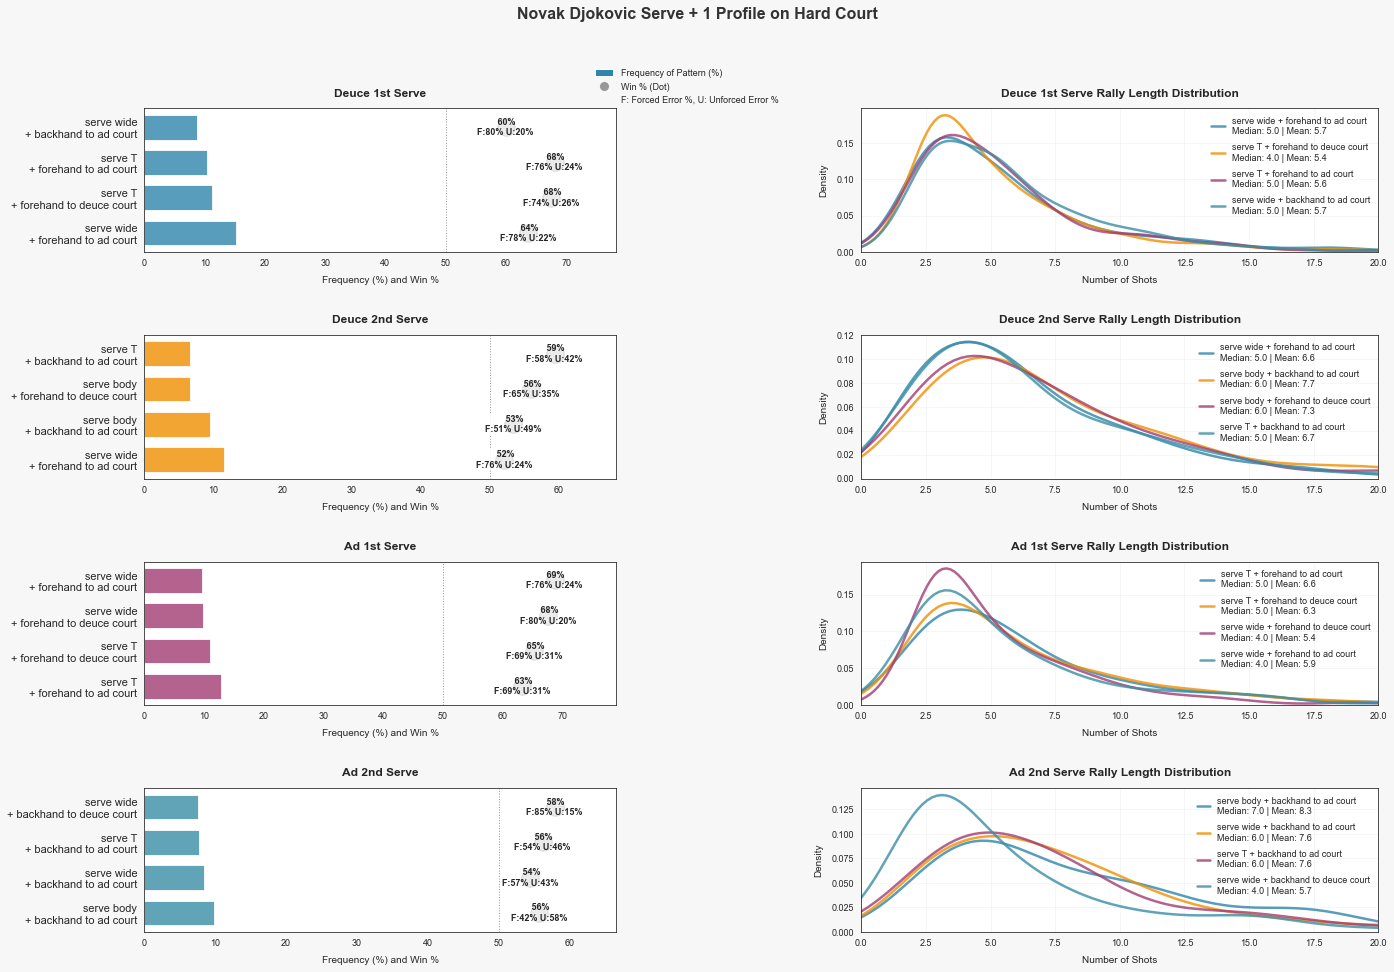

In [28]:
fig = create_player_profile(df, 'Novak Djokovic', 'Hard')

Length of df: 8523
No match rally for (0, 'P')
No match rally for (2, '6n4b81b2b2b3f2b1f1b3b2f1l2o2f2n#')


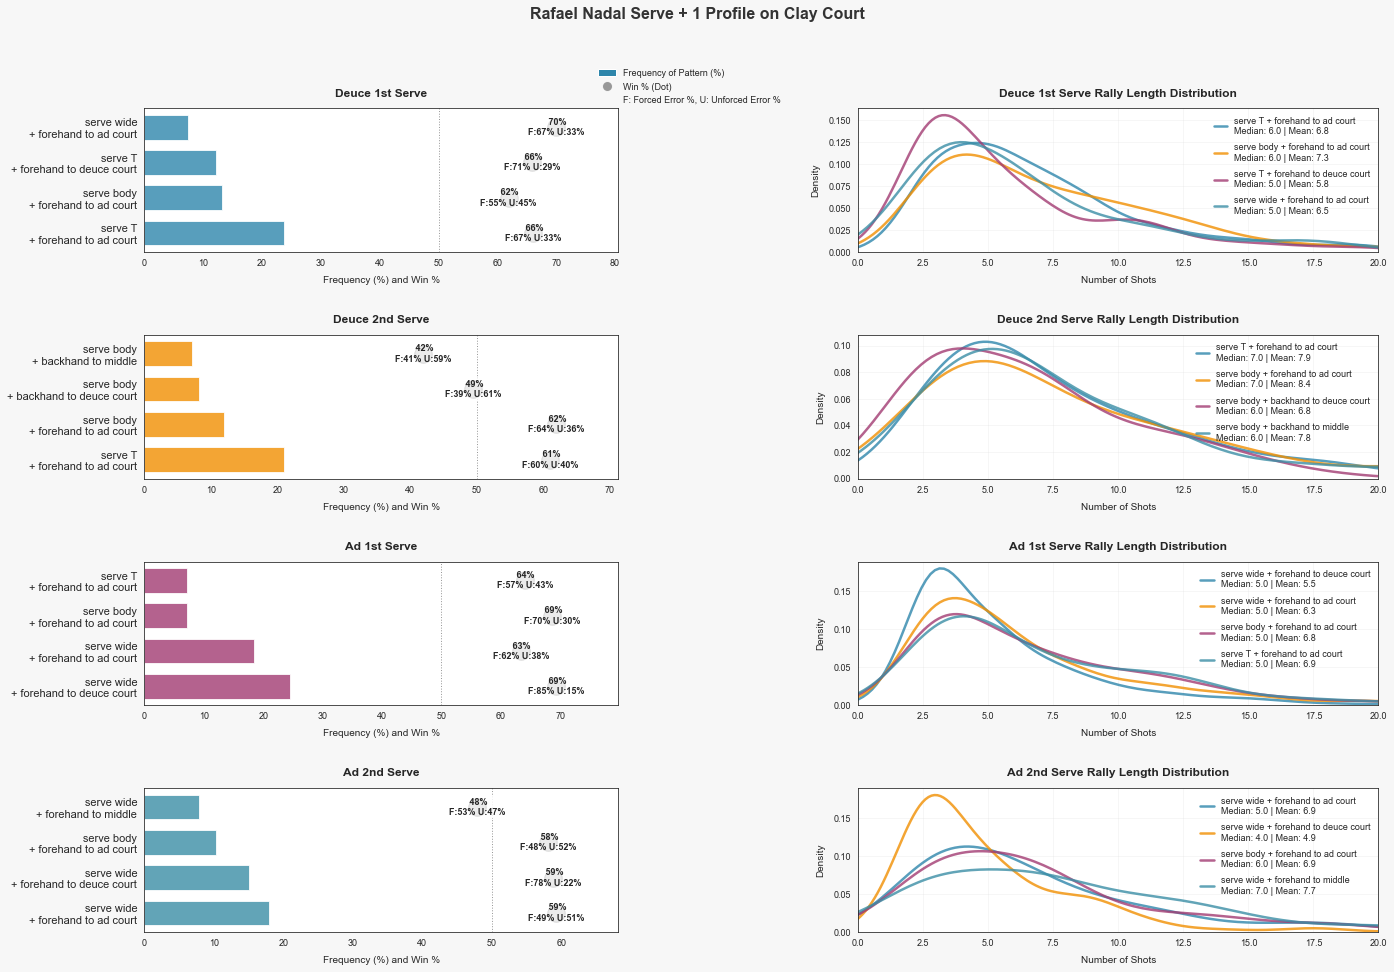

In [29]:
fig = create_player_profile(df, 'Rafael Nadal', 'Clay')

Length of df: 8245
No match rally for (20, '6f39b3b1f2f2b2s3b2sn3#')
No match rally for (14, '5b27f1f1f2f3bw1@')
No match rally for (1, '6W')
No match rally for (0, 'Q')
No match rally for (3, '5bw8b3s3d@')
No match rally for (2, '6d27f1f2z2n@')
No match rally for (2, '5d29f2f2f1f1f3s2d#')


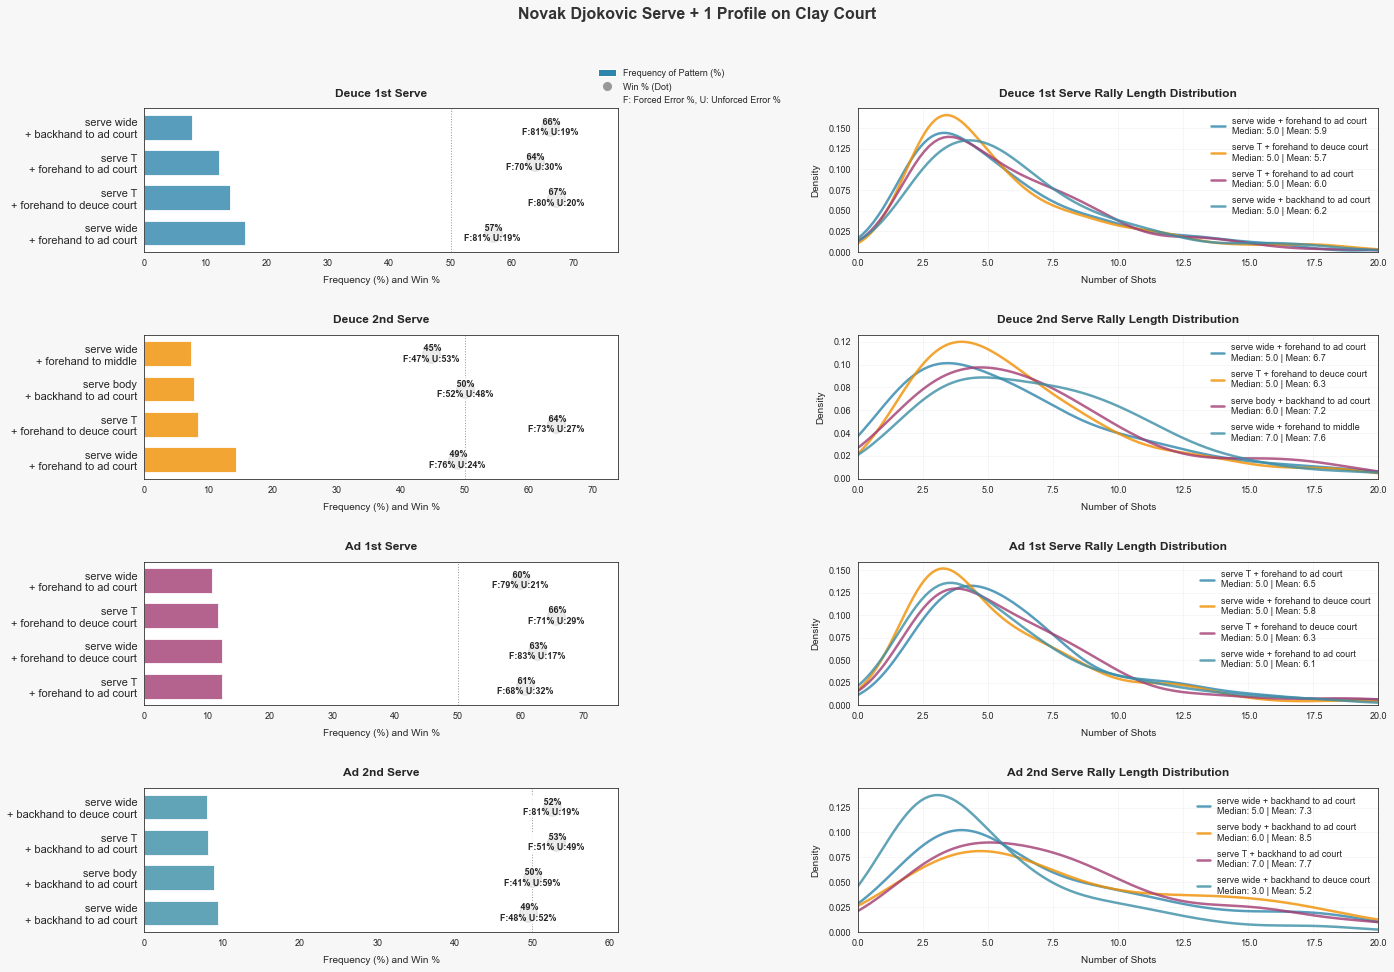

In [30]:
fig = create_player_profile(df, 'Novak Djokovic', 'Clay')

Length of df: 157
Length of df: 131


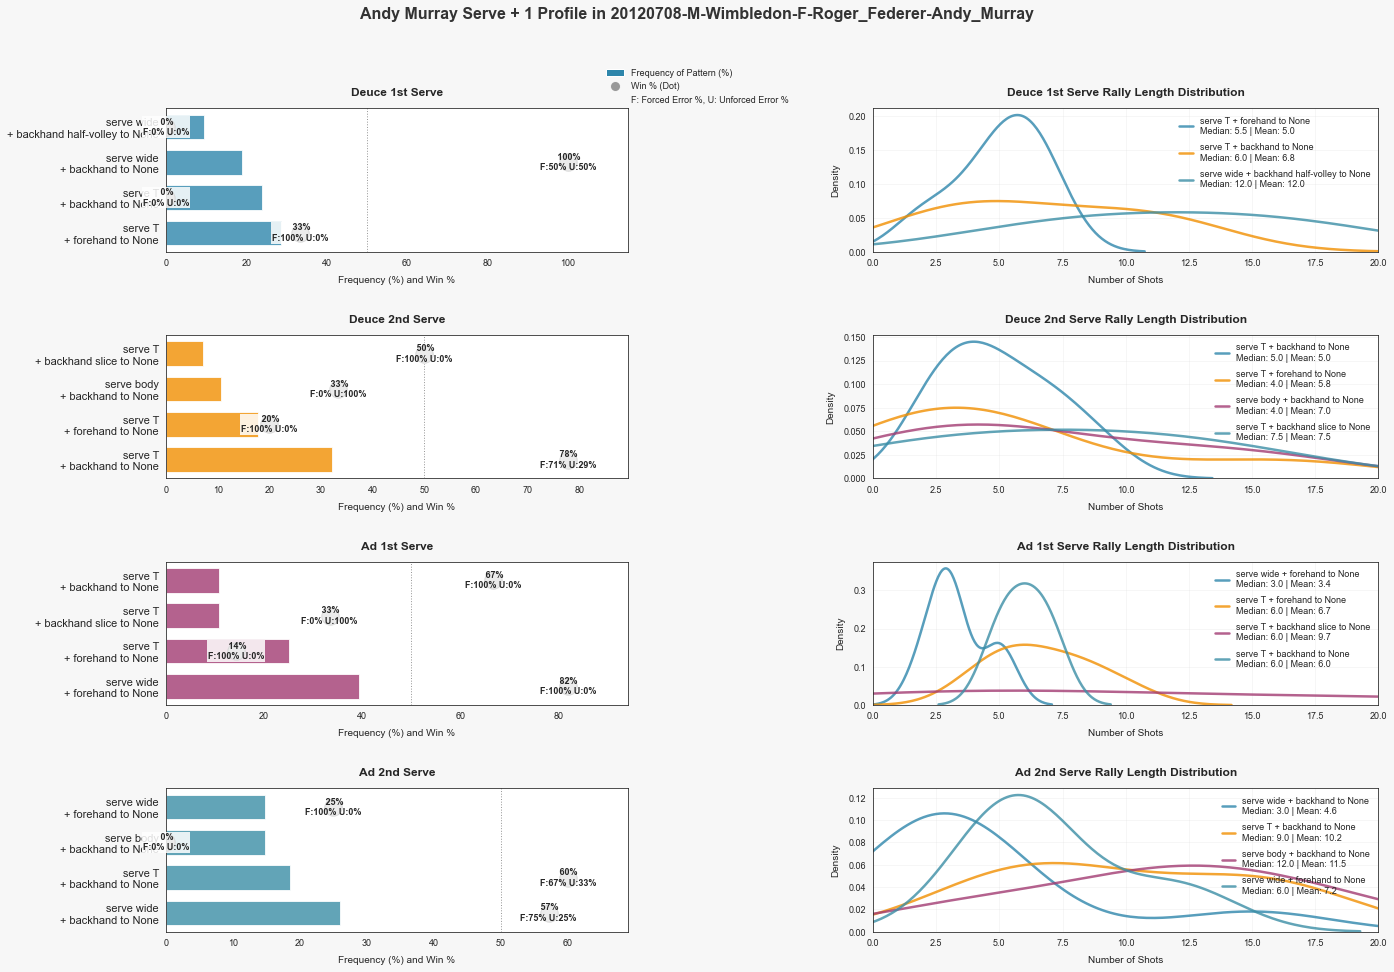

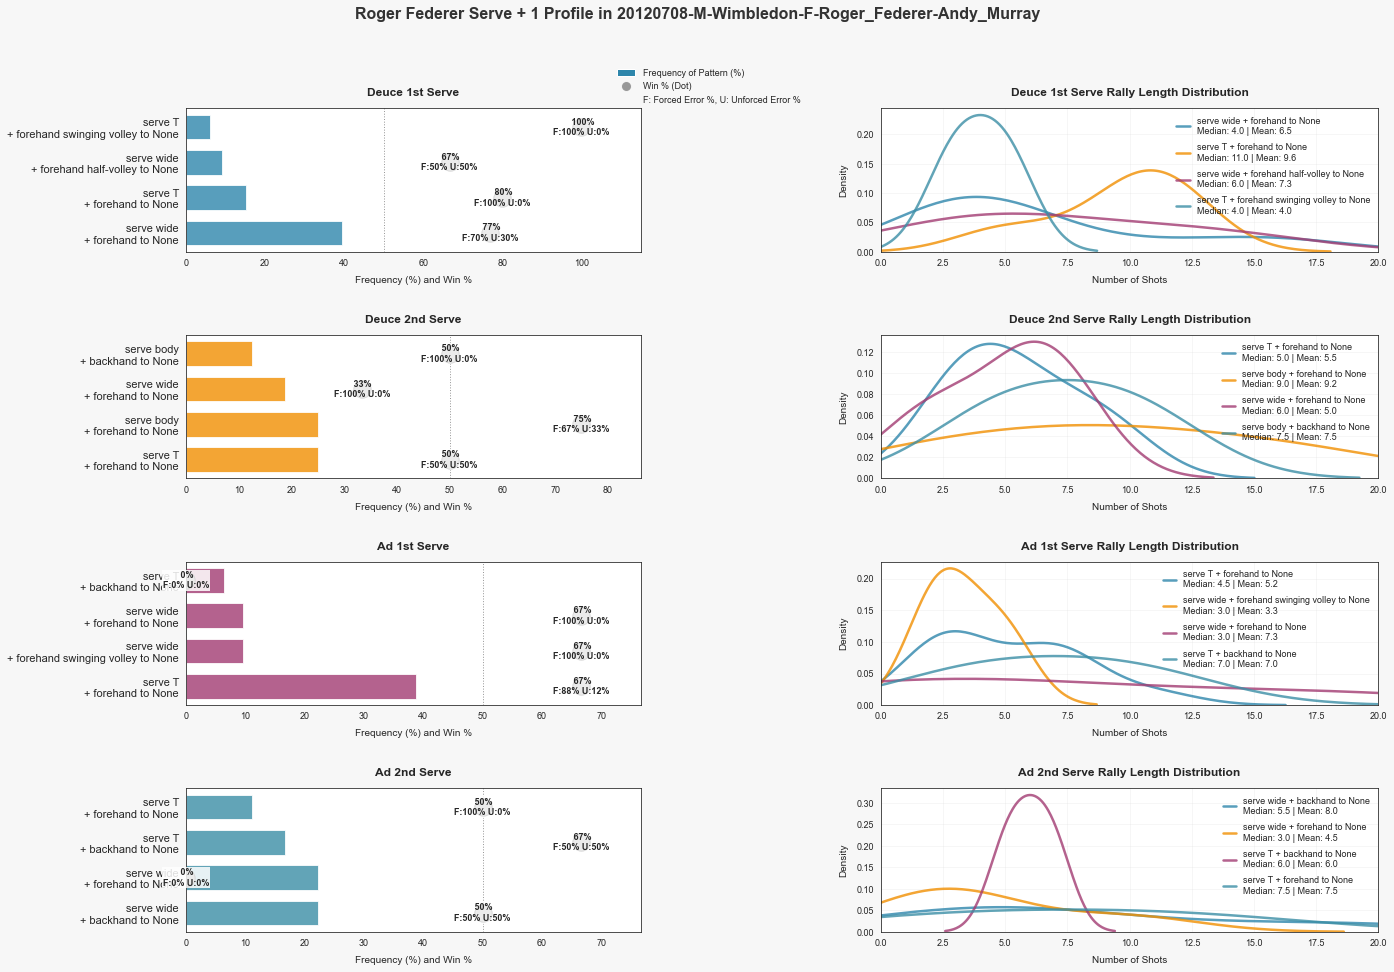

In [40]:
fig = create_player_profile(df, player_name = 'Andy Murray', match_id = '20120708-M-Wimbledon-F-Roger_Federer-Andy_Murray')
fig = create_player_profile(df, player_name = 'Roger Federer', match_id = '20120708-M-Wimbledon-F-Roger_Federer-Andy_Murray')